In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import statistics
import seaborn as sns 
from scipy import stats

plt.figure(figsize=(20,20))
%matplotlib inline

In [2]:
# Đọc csv

dt = pd.read_csv("Inc_Exp_Data.csv")
dt.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [3]:
# Xem thông tin các cột trong df

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


# **Distribution**

In [42]:
type_in = []
dt1=dt.copy()
for x in dt1['Mthly_HH_Income']:
    if x <= 20000:
        type_in.append('Low')
    elif x <= 50000:
        type_in.append('Good')
    elif x <= 80000:
        type_in.append('High')
    else:
        type_in.append('Very High')
dt1.insert(7, "Type_In", type_in)
dt1.head(15)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_In
0,5000,8000,3,2000,64200,Under-Graduate,1,Low
1,6000,7000,2,3000,79920,Illiterate,1,Low
2,10000,4500,2,0,112800,Under-Graduate,1,Low
3,10000,2000,1,0,97200,Illiterate,1,Low
4,12500,12000,2,3000,147000,Graduate,1,Low
5,14000,8000,2,0,196560,Graduate,1,Low
6,15000,16000,3,35000,167400,Post-Graduate,1,Low
7,18000,20000,5,8000,216000,Graduate,1,Low
8,19000,9000,2,0,218880,Under-Graduate,1,Low
9,20000,9000,4,0,220800,Under-Graduate,2,Low


In [43]:
# % Mức thu nhập

TI = dt1.groupby('Type_In')['Type_In'].count()
TI = pd.DataFrame(TI)
TI.columns = ['%']
ti_le = (TI/sum(TI['%']))*100
ti_le

,%
Type_In,
Good,52.0
High,14.0
Low,22.0
Very High,12.0


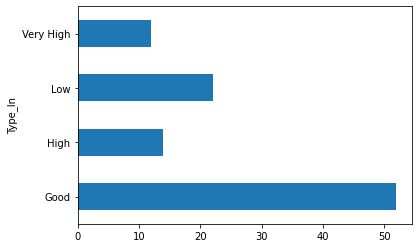

In [44]:
ti_le['%'].plot(x="Type_In",y="%",kind="barh")
plt.show()

In [45]:
type_out = []

for x in dt1['Mthly_HH_Expense']:
    if x <= 8000:
        type_out.append('Low')
    elif x <= 20000:
        type_out.append('Medium')
    elif x <= 40000:
        type_out.append('High')
    else:
        type_out.append('Very High')
dt1.insert(8, "Type_Out", type_out)
dt1.head(15)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_In,Type_Out
0,5000,8000,3,2000,64200,Under-Graduate,1,Low,Low
1,6000,7000,2,3000,79920,Illiterate,1,Low,Low
2,10000,4500,2,0,112800,Under-Graduate,1,Low,Low
3,10000,2000,1,0,97200,Illiterate,1,Low,Low
4,12500,12000,2,3000,147000,Graduate,1,Low,Medium
5,14000,8000,2,0,196560,Graduate,1,Low,Low
6,15000,16000,3,35000,167400,Post-Graduate,1,Low,Medium
7,18000,20000,5,8000,216000,Graduate,1,Low,Medium
8,19000,9000,2,0,218880,Under-Graduate,1,Low,Medium
9,20000,9000,4,0,220800,Under-Graduate,2,Low,Medium


In [46]:
# % Mức chi tiêu

TE = dt1.groupby('Type_Out')['Type_Out'].count()
TE = pd.DataFrame(TE)
TE.columns = ['%']
ti_le_1 = (TE/sum(TE['%']))*100
ti_le_1

,%
Type_Out,
High,24.0
Low,16.0
Medium,52.0
Very High,8.0


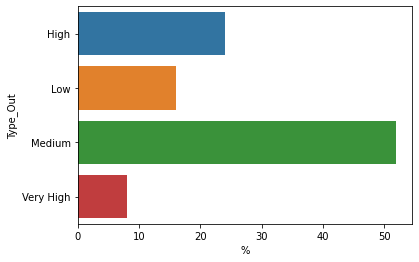

In [47]:
ti_le_1.reset_index(inplace=True)
sns.barplot(y='Type_Out',x='%',data = ti_le_1 )
plt.show()

In [48]:
# Trình độ học vấn cao nhất của thành viên trong hộ gia đình:

x = dt1.groupby('Highest_Qualified_Member')['Highest_Qualified_Member'].count()
x = pd.DataFrame(x)
x.columns = ['%']
Highest_Qualified_Member = x/sum(x['%'])*100
Highest_Qualified_Member

,%
Highest_Qualified_Member,
Graduate,38.0
Illiterate,10.0
Post-Graduate,12.0
Professional,20.0
Under-Graduate,20.0


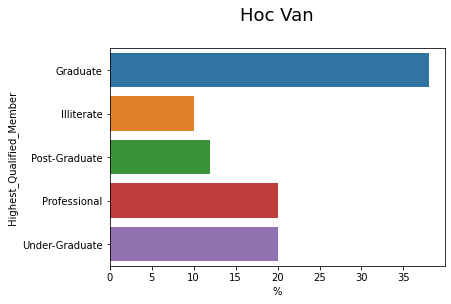

In [49]:
Highest_Qualified_Member.reset_index(inplace=True)
sns.barplot(y='Highest_Qualified_Member',x='%',data = Highest_Qualified_Member )
plt.title('Hoc Van', color = 'black', y = 1.1, fontsize = 18)
plt.show()

In [50]:
#Nhân khẩu:

NoFM = dt1.groupby('No_of_Fly_Members')['No_of_Fly_Members'].count()
NoFM = pd.DataFrame(NoFM)
NoFM.columns = ['%']
NoFM1 = NoFM/sum(NoFM['%'])*100
NoFM1

,%
No_of_Fly_Members,
1,2.0
2,16.0
3,18.0
4,30.0
5,10.0
6,20.0
7,4.0


<AxesSubplot:ylabel='No_of_Fly_Members'>

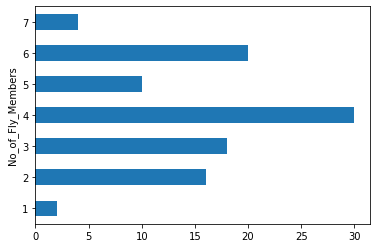

In [51]:
NoFM1['%'].plot(x="No_of_Fly_Members",y="%",kind="barh")

In [52]:
#khoản trả định kì

EoRA = dt1.groupby('Emi_or_Rent_Amt')['Emi_or_Rent_Amt'].count()
EoRA = pd.DataFrame(EoRA)
EoRA.columns = ['%']
EoRA1 = EoRA/sum(EoRA['%'])*100
EoRA1

,%
Emi_or_Rent_Amt,
0,60.0
1000,2.0
2000,4.0
2500,2.0
3000,4.0
3500,6.0
4000,2.0
5000,4.0
8000,4.0


<AxesSubplot:ylabel='Emi_or_Rent_Amt'>

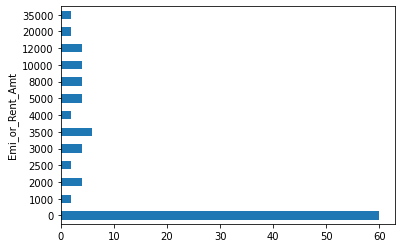

In [54]:
EoRA1['%'].plot(x="Emi_or_Rent_Amt",y="%",kind="barh")

In [55]:
#Bảng thống kê thu nhập hằng năm

AHI = dt1['Annual_HH_Income']
AHI.head(10)

0     64200
1     79920
2    112800
3     97200
4    147000
5    196560
6    167400
7    216000
8    218880
9    220800
Name: Annual_HH_Income, dtype: int64

<AxesSubplot:>

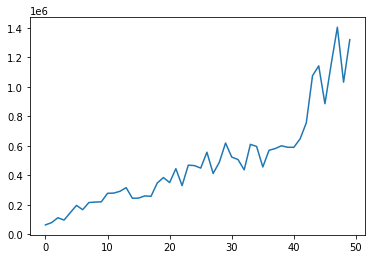

In [56]:

AHI.plot(x = '', y = 'Annual_HH_Income',kind = 'line')


In [57]:
#Bảng thống kê người kiếm ra tiền

NoEM = dt1.groupby('No_of_Earning_Members')['No_of_Earning_Members'].count()
NoEM = pd.DataFrame(NoEM)
NoEM.columns = ['%']
NoEM1 = NoEM/sum(NoEM['%'])*100
NoEM1

,%
No_of_Earning_Members,
1,66.0
2,24.0
3,8.0
4,2.0


<AxesSubplot:ylabel='No_of_Earning_Members'>

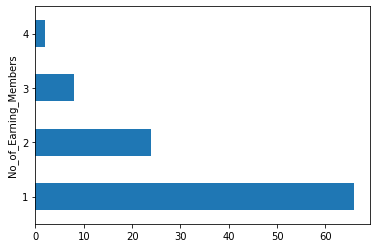

In [58]:
NoEM1['%'].plot(x="No_of_Earning_Members",y="%",kind="barh")

In [59]:

n=len(dt1['Mthly_HH_Expense'])
Type_residual = []
for i in range(n):
  h = dt1['Mthly_HH_Income'][i]-dt1['Mthly_HH_Expense'][i]
  if h<0:
    Type_residual.append('Thiếu')
  elif h<=10000:
    Type_residual.append('Đủ')
  elif h>10000:
    Type_residual.append('Dư')
dt1.insert(9, "Type_residual", Type_residual)
dt1.head(15)


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_In,Type_Out,Type_residual
0,5000,8000,3,2000,64200,Under-Graduate,1,Low,Low,Thiếu
1,6000,7000,2,3000,79920,Illiterate,1,Low,Low,Thiếu
2,10000,4500,2,0,112800,Under-Graduate,1,Low,Low,Đủ
3,10000,2000,1,0,97200,Illiterate,1,Low,Low,Đủ
4,12500,12000,2,3000,147000,Graduate,1,Low,Medium,Đủ
5,14000,8000,2,0,196560,Graduate,1,Low,Low,Đủ
6,15000,16000,3,35000,167400,Post-Graduate,1,Low,Medium,Thiếu
7,18000,20000,5,8000,216000,Graduate,1,Low,Medium,Thiếu
8,19000,9000,2,0,218880,Under-Graduate,1,Low,Medium,Đủ
9,20000,9000,4,0,220800,Under-Graduate,2,Low,Medium,Dư


In [60]:
# Bảng thống kê tỉ lệ thu nhập so với chi tiêu

TR = dt1.groupby('Type_residual')['Type_residual'].count()
TR = pd.DataFrame(TR)
TR.columns = ['%']
Type_residual = TR/sum(x['%'])*100
Type_residual

,%
Type_residual,
Dư,64.0
Thiếu,10.0
Đủ,26.0


<AxesSubplot:ylabel='Type_residual'>

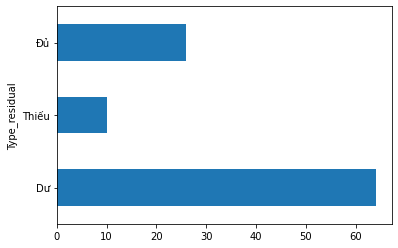

In [61]:
Type_residual['%'].plot(x="Type_residual",y="%",kind="barh")

<AxesSubplot:>

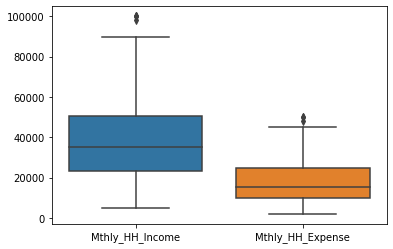

In [65]:
# boxplot so sánh thu chi hằng tháng

sns.boxplot(data=dt[['Mthly_HH_Income','Mthly_HH_Expense']])

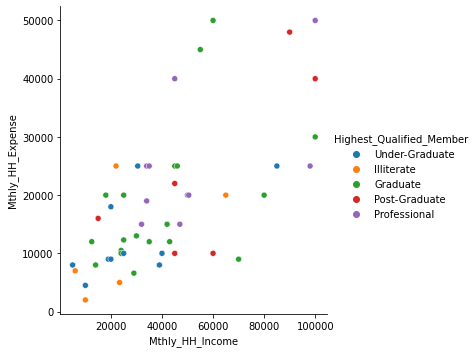

In [68]:
#Thống kê về chi tiêu hằng tháng so với trình độ học vấn

sns.relplot(data=dt, x="Mthly_HH_Income", y="Mthly_HH_Expense", hue='Highest_Qualified_Member',kind='scatter')

<AxesSubplot:>

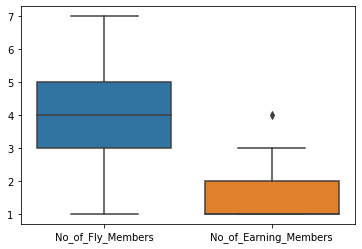

In [67]:
#boxplot so sánh số thành viên trong gia đình và số thành viên kiếm được tiền
sns.boxplot(data=dt[['No_of_Fly_Members','No_of_Earning_Members']])

# **Phép tính hướng tâm**

In [69]:
# Sử dụng hàm describe
dt.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [70]:
# Tính trung bình các cột 

print("Giá trị trung bình của data:")
pd.DataFrame(dt.mean())

Giá trị trung bình của data:


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_1428/3234744897.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(dt.mean())


,0
Mthly_HH_Income,41558.00
Mthly_HH_Expense,18818.00
No_of_Fly_Members,4.06
Emi_or_Rent_Amt,3060.00
Annual_HH_Income,490019.04
No_of_Earning_Members,1.46


In [71]:
# Tính trung vị của các cột

print("Trung vị của data:")
pd.DataFrame(dt.median())

Trung vị của data:


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_1428/1722055840.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(dt.median())


,0
Mthly_HH_Income,35000.0
Mthly_HH_Expense,15500.0
No_of_Fly_Members,4.0
Emi_or_Rent_Amt,0.0
Annual_HH_Income,447420.0
No_of_Earning_Members,1.0


In [72]:
# Tìm mode

print("Yếu vị của data:")
pd.DataFrame(dt.mode(dropna = True)).T

Yếu vị của data:


,0
Mthly_HH_Income,45000
Mthly_HH_Expense,25000
No_of_Fly_Members,4
Emi_or_Rent_Amt,0
Annual_HH_Income,590400
Highest_Qualified_Member,Graduate
No_of_Earning_Members,1


# **Dispersion**

In [73]:
#tính min của từng cột

print('min của data:')
pd.DataFrame(dt.min(skipna= True, numeric_only= True))

min của data:


,0
Mthly_HH_Income,5000
Mthly_HH_Expense,2000
No_of_Fly_Members,1
Emi_or_Rent_Amt,0
Annual_HH_Income,64200
No_of_Earning_Members,1


In [76]:
#tính max của từng cột

print('max của data:')
pd.DataFrame(dt.max(skipna= True, numeric_only= True))

max của data:


,0
Mthly_HH_Income,100000
Mthly_HH_Expense,50000
No_of_Fly_Members,7
Emi_or_Rent_Amt,35000
Annual_HH_Income,1404000
No_of_Earning_Members,4


In [77]:
# Tính độ lệch chuẩn - standard deviation
print("Độ lệch chuẩn của data:")
pd.DataFrame(dt.std(skipna = True))

Độ lệch chuẩn của data:


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_1428/1163647966.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(dt.std(skipna = True))


,0
Mthly_HH_Income,26097.908979
Mthly_HH_Expense,12090.216824
No_of_Fly_Members,1.517382
Emi_or_Rent_Amt,6241.434948
Annual_HH_Income,320135.792123
No_of_Earning_Members,0.734291


In [78]:
# Tính phương sai
print('Phương sai của data:')
pd.DataFrame(dt.var(skipna = True))

Phương sai của data:


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_1428/3651807046.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(dt.var(skipna = True))


,0
Mthly_HH_Income,6.811009e+08
Mthly_HH_Expense,1.461733e+08
No_of_Fly_Members,2.302449e+00
Emi_or_Rent_Amt,3.895551e+07
Annual_HH_Income,1.024869e+11
No_of_Earning_Members,5.391837e-01
